<a href="https://colab.research.google.com/github/abhinavgairola/Anomaly_Detection_OTC_Market/blob/main/Read_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as mp
mp.style.use('ggplot')
import requests
import numpy as np
from bs4 import BeautifulSoup
import re
import json
from google.colab import drive
drive.mount('/content/drive')
import csv
import pyarrow as pa
import json
from sklearn import preprocessing
import calendar
from termcolor import colored
import seaborn as sns
import plotly.express as px

cm = sns.light_palette("green", as_cmap=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Read the stocks data from the Parquet file

In [19]:
df_stocks = pd.read_parquet('/content/drive/MyDrive/OTCMKT/Stocks_data_3.parquet.gzip')



In [20]:
### Compute daily average using open, close, high, low and adjusted close price.
df_daily_average=(df_stocks['Open']+df_stocks['Close']+df_stocks['High']+df_stocks['Low'])/4

In [21]:
### Filter the columns where tghe NaN is less than 50%
df_daily_average = df_daily_average[df_daily_average.columns[df_daily_average.isnull().mean()<=0.5]].fillna(0)

In [22]:
df_daily_average.index.date

array([datetime.date(2016, 1, 4), datetime.date(2016, 1, 5),
       datetime.date(2016, 1, 6), ..., datetime.date(2021, 4, 9),
       datetime.date(2021, 4, 12), datetime.date(2021, 4, 13)],
      dtype=object)

## Read the tweet data from the json file and bring it to shape

In [23]:
#with open('/content/drive/MyDrive/OTCMKT/All_tweets_with_emojis_with_punctuations.json','r') as f:
#  data = (json.load(f))

   

In [24]:
#test = pd.DataFrame.from_dict(data, orient='index')

In [25]:

#test

In [26]:
#test = test.T

In [27]:
#columns = test.columns.str.startswith('Date')
#columns_2 = test.columns.str.startswith('Tweets')
#columns = test.columns[columns]
#test.melt(id_vars=list(columns),value_vars=list(test.columns[columns_2]))

In [28]:
#df = pd.DataFrame.from_dict(data, orient='index')
#print(df)
## This I am doing it to bring it to proper shape.
#Dates = []
#Tweets = []
#Ticker  = []
#for key, vals in data.items():
#  if key.find('Date')>-1:
#    Dates = Dates+vals
#  elif key.find('Tweets')>-1:
#    Tweets = Tweets+vals
#    Ticker = Ticker + [key.split('Tweets')[1]]*len(vals)
#df_tweets = pd.DataFrame({'Dates':Dates,'Tweets':Tweets,'Ticker':Ticker})

In [29]:
## Convert dates column to datetime index
#df_tweets['Dates'] = pd.to_datetime(df_tweets['Dates'])
#df_tweets.set_index('Dates')[['Ticker','Tweets']].to_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip',
#              compression='gzip')
df_tweets = pd.read_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip')

In [30]:
df_tweets = df_tweets.reset_index()#.set_index('Dates')[['Ticker','Tweets']]
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [31]:
Available_ticks = list(df_daily_average.columns)
Available_ticks

['RGBP',
 'HCMC',
 'DRNK',
 'FTEG',
 'INCT',
 'BDGR',
 'WWIO',
 'NUUU',
 'AZFL',
 'CBYI',
 'PHIL',
 'GDET',
 'GNCP',
 'ECEZ',
 'HAON',
 'FTXP',
 'MMEX',
 'IRNC',
 'GTEH',
 'INND',
 'ONCI',
 'KYNC',
 'LTNC',
 'INCC',
 'SVTE',
 'IMTL',
 'PLPL',
 'EFIR',
 'MLHC',
 'ABVG',
 'CBDL',
 'TBEV',
 'MDCN',
 'VIBI',
 'GRLT',
 'GTLL',
 'UVSE',
 'AMLH',
 'FOYJ',
 'FERN',
 'SIML',
 'TMGI',
 'GGII',
 'BEHL',
 'USEI',
 'SANP',
 'BLSP',
 'TGRO',
 'BOTY',
 'SUTI',
 'WNBD',
 'AITX',
 'MRNJ',
 'PRPM',
 'FCGD',
 'ILST',
 'AHFD',
 'ETFM',
 'PRMO',
 'TGGI',
 'IGEX',
 'ECOS',
 'ADGO',
 'SPQS',
 'PLYZ',
 'FBCD',
 'ADTM',
 'SNRS',
 'NWGC',
 'ENTI',
 'TWOH',
 'PBHG',
 'APPZ',
 'KGET',
 'MINE',
 'UBQU',
 'MTVX',
 'SEEK',
 'SDVI',
 'TPAC',
 'RCHA',
 'ICNM',
 'PYCT',
 'RMRK',
 'APYP',
 'VPER',
 'COWI',
 'BBRW',
 'ICBU',
 'HQGE',
 'BUNM',
 'MSPC',
 'PDMI',
 'HPIL',
 'AAGC',
 'HBRM',
 'USMJ',
 'IHSI',
 'HPNN',
 'WDLF',
 'AFOM',
 'ETEK',
 'HVCW',
 'DSCR',
 'BSSP',
 'PVSP',
 'MAXD',
 'MDIN',
 'PVDG',
 'BLUU',
 'RMTD',
 

In [32]:
df_tweets=df_tweets[df_tweets.Ticker.isin(Available_ticks)]

In [33]:
bar_plot_data = pd.DataFrame(df_tweets.set_index('Date').groupby('Ticker')['Tweets'].count()).reset_index().sort_values(by='Tweets',ascending=True).rename(columns={'Tweets':'Counts'})

In [34]:
bar_plot_data

,Ticker,Counts
886,WWNG,8
734,SNYL,10
883,WTRO,11
336,GPKE,13
84,BFLD,16
...,...,...
306,GBTC,95739
509,MINE,97953
195,DIRV,102652
249,ENZC,112244


In [36]:
list(bar_plot_data.tail(20).Ticker.values)

['OZSC',
 'WDLF',
 'SPOM',
 'AZFL',
 'NWBO',
 'SFOR',
 'MJNA',
 'SBES',
 'TTCM',
 'HMNY',
 'ANDI',
 'TRTC',
 'LTNC',
 'FNMA',
 'HCMC',
 'GBTC',
 'MINE',
 'DIRV',
 'ENZC',
 'OPTI']

In [37]:
fig_1 = px.bar(bar_plot_data.tail(20), x='Counts', y='Ticker', orientation='h',labels=dict(x="Counts", y="Keywords"),color='Counts',color_continuous_scale=px.colors.sequential.Emrld)
fig_1.update_layout(font=dict(family="Times New Roman",
        size=18,
        color="black"))

In [38]:
columns_list_of_stocks = list(bar_plot_data.tail(200).Ticker.values)#df_daily_average.columns)
#for idx, d in enumerate(columns_list_of_stocks):
#  if idx == 0:
#    print(columns_list_of_stocks[idx])
columns_list_of_stocks

['HALB',
 'JADA',
 'DSCR',
 'NBDR',
 'BIEI',
 'VIBI',
 'FDBL',
 'SHOM',
 'DPLS',
 'HENC',
 'PTOP',
 'LIGA',
 'BTDG',
 'GDET',
 'HMPQ',
 'GNCP',
 'CAVR',
 'PZOO',
 'MSMY',
 'RGGI',
 'APYP',
 'DEWM',
 'KSHB',
 'LFAP',
 'KYNC',
 'KBLB',
 'MFST',
 'BFCH',
 'HVCW',
 'DCAC',
 'CYIO',
 'MSRT',
 'HQGE',
 'TWOH',
 'RETC',
 'IQST',
 'ZHUD',
 'ADOM',
 'DGTW',
 'ARSN',
 'LLLI',
 'TSOI',
 'NGTF',
 'ECEZ',
 'CBDL',
 'BRLL',
 'JNSH',
 'SHMN',
 'HAON',
 'RGBP',
 'LCLP',
 'RJDG',
 'TBEV',
 'BMIX',
 'PAOG',
 'GTEH',
 'DBMM',
 'DLCR',
 'SNPW',
 'GAHC',
 'IGPK',
 'KALY',
 'MAXD',
 'IPIX',
 'AGTK',
 'SBFM',
 'GTII',
 'AAGC',
 'VSYM',
 'INTV',
 'NSPX',
 'MYDX',
 'DECN',
 'SNMN',
 'RMRK',
 'ABCE',
 'CCTL',
 'PASO',
 'MSPC',
 'CGRA',
 'XTRM',
 'KOSK',
 'RDGL',
 'ICLD',
 'RBNW',
 'BIEL',
 'VISM',
 'BMXC',
 'ADTM',
 'MLHC',
 'IFXY',
 'APRU',
 'TRNX',
 'RSHN',
 'TPAC',
 'STHC',
 'TVOG',
 'MRNJ',
 'RDAR',
 'BLSP',
 'DATI',
 'NUGS',
 'USRM',
 'INKW',
 'ALYI',
 'RNWF',
 'SIML',
 'SGMD',
 'DRNK',
 'BTCS',
 'RMHB',
 

In [39]:
## loc doesn't support list with missing values anymore using filter method.
#df_daily_average['XTRM'].filter(items=time_list_unique).plot(figsize=(20,10))
#columns_list_of_stocks = sorted(columns_list_of_stocks)[::-1]

In [40]:

df_daily_average_copy = df_daily_average.copy()


def mean_std(Ticker_name,dataframe):

  """
  The utility of this method is 
  1) Select those days where the tweet counts is > 100.
  2) Compute the 20 days backward average as mentioned in this work:-https://qspace.library.queensu.ca/bitstream/handle/1974/28239/David_Nam_K_202010_MSC.pdf?sequence=2&isAllowed=y
  3) Compute the standard deviation too on the same time scale
  """

  time_delta = datetime.timedelta(1)

  df_daily_average_copy = dataframe.copy()
  
  ## select those days where the tweet counts is > 100
  time_list = list(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)].index)#list((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates']))
  
  #print(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)])
  time_list_unique=(time_list)#list(pd.to_datetime((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates'].unique())))

  #print(time_list_unique)
  date = []
  Data_mean = []
  Data_std = []
  
  for time in time_list_unique[::-1]:

    filtering = [time-i*time_delta for i in range(1,20) if calendar.day_name[(time-i*time_delta).weekday()] in ['Monday','Tuesday','Wednesday','Thursday','Friday'] ]
    date.append(time)
    Data_mean.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().mean())
    Data_std.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().std())

  return pd.DataFrame({'Date':date,'Mean_'+Ticker_name:Data_mean,'Std_'+Ticker_name:Data_std}).set_index('Date')


## Loop through the tickers and merge the above computation to the copy of the stock dataframe.
for idx,tick in enumerate(columns_list_of_stocks[0:200]):
  print(colored(idx,'red'),colored(tick,'green') )
  intermediate = mean_std(tick,df_daily_average)
  #print(test)

  df_daily_average_copy = pd.concat([df_daily_average_copy,intermediate],axis=1)#df_daily_average_copy.combine_first(test)
  #test_4 = pd.concat([df_daily_average,test_3],axis=1).rename(columns={0:'Indicator_XTRM'})
  #test_4 =pd.concat([test_4,test_5],axis=1).rename(columns={'Tweets':'Tweets_XTRM'})

#df_daily_average=df_daily_average.combine_first(pd.DataFrame({'Date':date,'Ticker_mean':XTRM_mean,'Ticker_std':XTRM_std}).set_index('Date'))
#df_daily_average

0 HALB
1 JADA
2 DSCR
3 NBDR
4 BIEI
5 VIBI
6 FDBL
7 SHOM
8 DPLS
9 HENC
10 PTOP
11 LIGA
12 BTDG
13 GDET
14 HMPQ
15 GNCP
16 CAVR
17 PZOO
18 MSMY
19 RGGI
20 APYP
21 DEWM
22 KSHB
23 LFAP
24 KYNC
25 KBLB
26 MFST
27 BFCH
28 HVCW
29 DCAC
30 CYIO
31 MSRT
32 HQGE
33 TWOH
34 RETC
35 IQST
36 ZHUD
37 ADOM
38 DGTW
39 ARSN
40 LLLI
41 TSOI
42 NGTF
43 ECEZ
44 CBDL
45 BRLL
46 JNSH
47 SHMN
48 HAON
49 RGBP
50 LCLP
51 RJDG
52 TBEV
53 BMIX
54 PAOG
55 GTEH
56 DBMM
57 DLCR
58 SNPW
59 GAHC
60 IGPK
61 KALY
62 MAXD
63 IPIX
64 AGTK
65 SBFM
66 GTII
67 AAGC
68 VSYM
69 INTV
70 NSPX
71 MYDX
72 DECN
73 SNMN
74 RMRK
75 ABCE
76 CCTL
77 PASO
78 MSPC
79 CGRA
80 XTRM
81 KOSK
82 RDGL
83 ICLD
84 RBNW
85 BIEL
86 VISM
87 BMXC
88 ADTM
89 MLHC
90 IFXY
91 APRU
92 TRNX
93 RSHN
94 TPAC
95 STHC
96 TVOG
97 MRNJ
98 RDAR
99 BLSP
100 DATI
101 NUGS
102 USRM
103 INKW
104 ALYI
105 RNWF
106 SIML
107 SGMD
108 DRNK
109 BTCS
110 RMHB
111 PHIL
112 AITX
113 TLSS
114 AMLH
115 VMNT
116 BTSC
117 ASTI
118 AFOM
119 GTCH
120 SIRC
121 KGKG
122 MEDH
123

In [41]:

Mean_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Mean")]]


In [42]:
Std_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Std")]]

In [43]:
Mean_data.isnull().mean()#.style.background_gradient(cmap=cm)

Mean_HALB    0.978584
Mean_JADA    0.978584
Mean_DSCR    0.985723
Mean_NBDR    0.995836
Mean_BIEI    0.992267
               ...   
Mean_GBTC    0.842356
Mean_MINE    0.857823
Mean_DIRV    0.851874
Mean_ENZC    0.880428
Mean_OPTI    0.814396
Length: 200, dtype: float64

In [44]:
Mean_data

,Mean_HALB,Mean_JADA,Mean_DSCR,Mean_NBDR,Mean_BIEI,Mean_VIBI,Mean_FDBL,Mean_SHOM,Mean_DPLS,Mean_HENC,Mean_PTOP,Mean_LIGA,Mean_BTDG,Mean_GDET,Mean_HMPQ,Mean_GNCP,Mean_CAVR,Mean_PZOO,Mean_MSMY,Mean_RGGI,Mean_APYP,Mean_DEWM,Mean_KSHB,Mean_LFAP,Mean_KYNC,Mean_KBLB,Mean_MFST,Mean_BFCH,Mean_HVCW,Mean_DCAC,Mean_CYIO,Mean_MSRT,Mean_HQGE,Mean_TWOH,Mean_RETC,Mean_IQST,Mean_ZHUD,Mean_ADOM,Mean_DGTW,Mean_ARSN,...,Mean_VYST,Mean_MCOA,Mean_AMMJ,Mean_NECA,Mean_SANP,Mean_ERBB,Mean_GTLL,Mean_OTTV,Mean_CYDY,Mean_AABB,Mean_TPTW,Mean_ONCI,Mean_MMEX,Mean_INND,Mean_GRNF,Mean_HEMP,Mean_HBRM,Mean_GAXY,Mean_OWCP,Mean_CBBT,Mean_OZSC,Mean_WDLF,Mean_SPOM,Mean_AZFL,Mean_NWBO,Mean_SFOR,Mean_MJNA,Mean_SBES,Mean_TTCM,Mean_HMNY,Mean_ANDI,Mean_TRTC,Mean_LTNC,Mean_FNMA,Mean_HCMC,Mean_GBTC,Mean_MINE,Mean_DIRV,Mean_ENZC,Mean_OPTI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,9.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3875,0.000775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,8.93125,NaN,71.874938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.23375,NaN,NaN,NaN,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3875,0.000806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103886,NaN,NaN,NaN,0.00241,NaN,0.001449,NaN,NaN,NaN,0.086106,NaN,NaN,NaN,NaN,0.003707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.006233,NaN,0.006021,NaN,2.776250,0.290699,NaN,NaN,0.001870,0.024266,NaN,NaN,0.002122,NaN,NaN,0.056168,0.106955,0.020197,NaN,0.005481,1.522917,0.109232,NaN,NaN,0.012724,NaN,NaN,NaN,0.056422,1.982292,0.001224,48.900729,0.019190,NaN,0.231692,0.133879
2021-04-09,NaN,NaN,0.006627,NaN,NaN,NaN,NaN,NaN,0.012513,0.106454,NaN,NaN,NaN,NaN,NaN,0.001451,NaN,NaN,NaN,0.085687,NaN,NaN,NaN,NaN,0.004039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.006298,NaN,0.005902,NaN,2.803269,0.292170,NaN,NaN,0.001864,0.025992,NaN,NaN,0.002093,NaN,NaN,0.054716,0.105766,0.020030,NaN,0.005652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057112,NaN,0.001212,NaN,0.018081,NaN,0.229452,0.133830
2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [45]:
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [46]:
#(pd.DataFrame({'Date':date,'Ticker_mean':XTRM_mean}).set_index('Date')).plot(marker='o',figsize=(40,10))
#df_daily_average['Ticker_mean'].plot(marker='*',figsize=(40,10),color='green')
#df_daily_average['XTRM'].dropna().plot(figsize=(20,10))
final_df = df_daily_average.copy()
def helper_label(list_,df_):
  """
  1) Create indicator 0 (No pump) and 1 (pump) variables by comparing the average price of the day with the 2*backward looking standard deviation + backward looking mean for the selected days.
  2) Count the tweets for the ticker by grouping them with the date.
  3) Merge the two variables with the data frame.
  """
  for idx,tick in enumerate(list_):
    indicator = pd.DataFrame((df_daily_average_copy[tick] > 2*df_daily_average_copy['Std'+'_'+tick]+df_daily_average_copy['Mean_'+tick]).astype(int))
    #mp.figure(idx,figsize=(20,10))
    tweets = df_tweets[df_tweets['Ticker']==tick].groupby('Date')['Tweets'].count()
    normal_tweet  = ((tweets-tweets.min())/(tweets.max()-tweets.min()))
    #mp.plot(normal_tweet.index,normal_tweet.values,label="Tweet_"+tick)
    normal_data = ((df_daily_average_copy[tick]-df_daily_average_copy[tick].min())/(df_daily_average_copy[tick].max()-df_daily_average_copy[tick].min())).dropna()#.plot()
    #mp.plot(normal_data.index, normal_data.values,label='Stock_'+tick)
    #mp.plot(indicator.index,indicator.values,label='label'+'_'+tick)
    #mp.legend(loc='best')
    #print("This is indicator {}".format(indicator))
    df_ = pd.concat([df_,indicator],axis=1).rename(columns={0:'Indicator_'+tick})
    df_ = pd.concat([df_,tweets],axis=1).rename(columns={'Tweets':'Tweets_'+tick})

  return df_
temporary_step = helper_label(columns_list_of_stocks[0:200],final_df)
#temporary_step

In [47]:

#pd.concat([t[['Tweets_RGBP','Indicator_RGBP','XTRM']].melt(id_vars='Tweets_RGBP',value_vars=['Indicator_RGBP']),pd.DataFrame(t[['Tweets_RGBP','Indicator_RGBP','XTRM']].index)],axis=1)
#t.columns[list(t.columns.str.startswith('Tweet'))

def cleaning_up(columns_list_of_stocks, idx,df_):
  """
  Create a clean melted dataframe with id variables Tweets_tickers and value variables as Indicator
  """

  df_clean = pd.DataFrame()
  #indexes = []

  for tick in columns_list_of_stocks[0:idx]:
    temp = pd.concat([df_[['Tweets_'+tick,'Indicator_'+tick,tick]].melt(id_vars='Tweets_'+tick,value_vars=['Indicator_'+tick]),pd.DataFrame(df_[['Tweets_'+tick,'Indicator_'+tick,tick]].index)],axis=1)
    #temp = pd.concat([temp,pd.DataFrame(df_[tick].values)],axis=1)
    temp.rename(columns={'Tweets_'+tick:'Tweet_counts'},inplace=True)
    df_clean = pd.concat([df_clean,temp],axis=0)
    #df_clean = pd.concat([df_clean,(df_[tick])],axis=1)
    #print(list(df_[tick].index))
    #indexes = indexes+list(df_[tick].index)
  print(df_clean)
  return df_clean.rename(columns={0:'Price'})#,indexes

all_clean = cleaning_up(columns_list_of_stocks,200,temporary_step)
all_clean.rename(columns={'value':'Indicator'},inplace=True)
## Keep the indicators where only more than 100 tweets are there as it was the case above.
all_clean = all_clean[all_clean['Tweet_counts']>=100]
all_clean['variable'] = all_clean['variable'].apply(lambda x: x.split('_')[1])
all_clean

      Tweet_counts        variable  value       Date
0              NaN  Indicator_HALB    NaN 2016-01-01
1              NaN  Indicator_HALB    0.0 2016-01-02
2              NaN  Indicator_HALB    0.0 2016-01-03
3              NaN  Indicator_HALB    0.0 2016-01-04
4              1.0  Indicator_HALB    0.0 2016-01-05
...            ...             ...    ...        ...
1925         348.0  Indicator_OPTI    0.0 2021-04-09
1926          83.0  Indicator_OPTI    0.0 2021-04-10
1927           NaN  Indicator_OPTI    NaN 2021-04-11
1928           NaN  Indicator_OPTI    0.0 2021-04-12
1929           NaN  Indicator_OPTI    0.0 2021-04-13

[386000 rows x 4 columns]


,Tweet_counts,variable,Indicator,Date
1551,117.0,HALB,1.0,2020-03-31
1553,129.0,HALB,1.0,2020-04-02
1554,103.0,HALB,0.0,2020-04-03
1557,188.0,HALB,1.0,2020-04-06
1559,106.0,HALB,0.0,2020-04-08
...,...,...,...,...
1921,375.0,OPTI,0.0,2021-04-05
1922,309.0,OPTI,0.0,2021-04-06
1923,334.0,OPTI,0.0,2021-04-07
1924,510.0,OPTI,0.0,2021-04-08


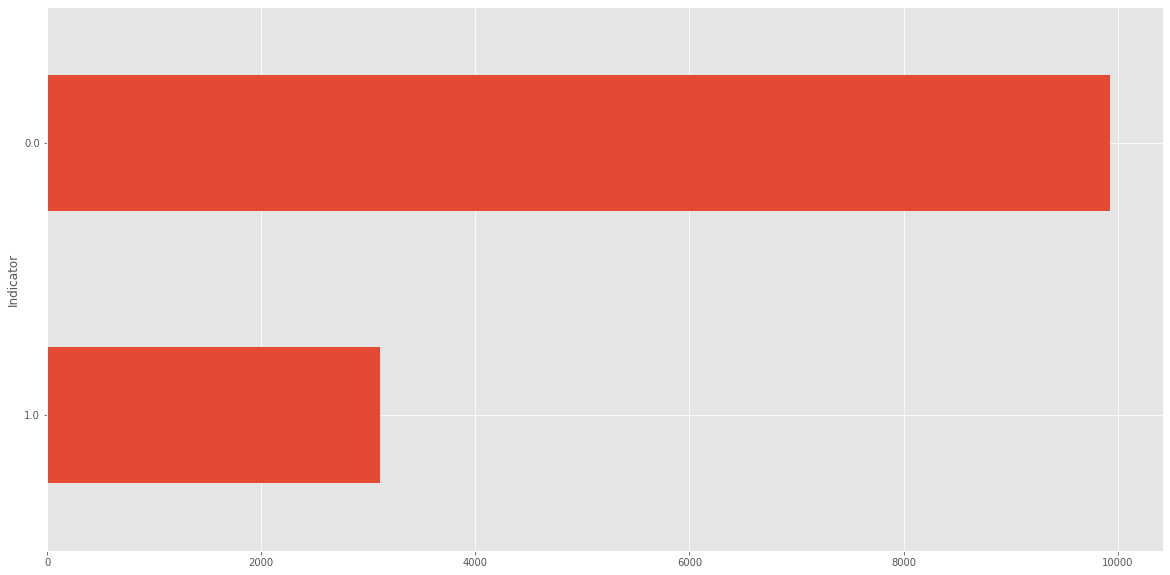

In [48]:
all_clean[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values().plot(kind='barh',figsize=(20,10))

In [49]:
!pip install vaderSentiment

In [50]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 from collections import Counter
 analyzer = SentimentIntensityAnalyzer()

In [ ]:
Tweets = []
Ticker = []
Sentiment = []
Price = []
Dates = []
for Ticker_name in columns_list_of_stocks[0:200]:
  print(Ticker_name)
  g = df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')
  #print((g.groups.keys()))
  idx = (df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=300)].index)

  #print(g.groups.keys())#[pd.to_datetime(idx[0])])
  #print(g.groups[idx[0]])
  #groups = [unused_df for name,unused_df in g]

  for i,j in g:
    sentiment = []
    if i in idx:
      Dates.append(i)
      #print(i)
      for tweet in (j.iloc[:,2].values):
        #print(tweet)
        vs = analyzer.polarity_scores(tweet)
        Tweets.append(tweet)
        #sentiment.append(vs['compound'])
        if(vs['compound'])>=0.05:
          sentiment.append(1)
        elif (vs['compound'])>-0.05 and (vs['compound'])<0.05:
          sentiment.append(0)
        elif (vs['compound'])<=-0.05:
          sentiment.append(-1)
      counts = Counter(sentiment)
      #print(sentiment)
      #if counts.keys() in [0,1]
      #print(counts[-1],counts)
      net = (counts[1]-counts[-1])/(counts[1]+counts[0]+counts[-1])
      #print(net)
      Sentiment.append(net)
      Ticker.append(Ticker_name)
  print(len(Dates))
  print(len(df_daily_average[Ticker_name].filter(items=Dates)),len(Sentiment))
  #ttt
      #ttt
  #Price.append(df_daily_average[[Ticker_name]].filter(items=Dates).values)
      
        
      


  
print(Sentiment)      


HALB
5
5 5
JADA
7
7 7
DSCR
8
8 8
NBDR
9
9 9
BIEI
9
9 9
VIBI
11
11 11
FDBL
12
12 12
SHOM
13
13 13
DPLS
17
17 17
HENC
27
26 27
PTOP
28
27 28
LIGA
28
27 28
BTDG
31
30 31
GDET
32
31 32
HMPQ
33
32 33
GNCP
37
36 37
CAVR
37
36 37
PZOO
38
37 38
MSMY
39
38 39
RGGI
50
49 50
APYP
56
55 56
DEWM
56
55 56
KSHB
56
55 56
LFAP
61
60 61
KYNC
63
62 63
KBLB
63
62 63
MFST
65
64 65
BFCH
66
65 66
HVCW
76
72 76
DCAC
80
74 80
CYIO
81
75 81
MSRT
84
78 84
HQGE
96
90 96
TWOH
98
92 98
RETC
98
92 98
IQST
98
92 98
ZHUD
105
99 105
ADOM
107
101 107
DGTW
113
107 113
ARSN
115
109 115
LLLI
118
112 118
TSOI
121
115 121
NGTF
122
116 122
ECEZ
131
125 131
CBDL
136
130 136
BRLL
146
140 146
JNSH
151
145 151
SHMN
151
145 151
HAON
151
145 151
RGBP
155
148 155
LCLP
158
151 158
RJDG
158
151 158
TBEV
160
153 160
BMIX
163
156 163
PAOG
163
156 163
GTEH
164
157 164
DBMM
164
157 164
DLCR
164
157 164
SNPW
165
158 165
GAHC
166
159 166
IGPK
166
159 166
KALY
167
160 167
MAXD
172
165 172
IPIX
172
165 172
AGTK
172
165 172
SBFM
173
166 173
GT

In [ ]:
Sentiment_df = pd.DataFrame({'Ticker_name':Ticker,'Sentiment_Score':Sentiment})
len(Dates)
#len(Tweets)
#len(Sentiment)
(Sentiment_df[Sentiment_df['Ticker_name']=='RGBP'])
#mp.plot(Sentiment_df['Date'],Sentiment_df['Sentiment_Score'],'o')
#print(len(Price),len(Ticker))

In [ ]:
#pd.concat([Sentiment_df,all_clean],axis=1)
data = pd.concat([all_clean.reset_index().drop('index',axis=1),Sentiment_df],axis=1)
data['Date']#[['Tweet_counts']]
data#.drop('variable',axis=1)
print("Check if the variable and Ticker_name columns are equal: {}".format(colored(data.variable.equals(data.Ticker_name),'red')))
data.set_index('Date',inplace=True)
data.drop('variable',axis=1,inplace=True)

In [ ]:
data.head(5)

In [ ]:
data[data.Ticker_name=='INND']

In [ ]:
df_daily_average['INND'].filter(items=list(data[data.Ticker_name=='INND'].index)).dropna()

In [ ]:
def Merge_prices(tickers,df_,df_2):
  empty = pd.DataFrame()
  data_ = df_.copy()
  data_2 = df_2.copy()
  for ticks in tickers:
    empty=pd.concat([empty,pd.concat([data_[data_.Ticker_name==ticks],data_2[ticks].filter(items=list(data_[data_.Ticker_name==ticks].index)).dropna()],axis=1)])
    #print(data_)
  return empty

Clean_final = Merge_prices(columns_list_of_stocks[0:20],data,df_daily_average)
#Clean_final
## This is not working as it is supposed too--check the merge method in pandas and then try

In [ ]:
df_daily_average.columns
copy = df_daily_average.reset_index().melt(id_vars='Date',value_vars=df_daily_average.reset_index().columns[1:]).rename(columns={'Symbols':'Ticker_name'}).rename(columns={'value':'Price'})
copy

In [ ]:
Final_data = pd.merge(copy,data.reset_index(),on=['Date','Ticker_name'])
Final_data[Final_data.Ticker_name=='INND']

In [126]:
Final_data.sort_values(by='Tweet_counts')

,Date,Ticker_name,Price,Tweet_counts,Indicator,Sentiment_Score
7734,2018-01-03,GBTC,25.624945,100.0,0.0,-0.110000
11506,2020-12-21,AMMJ,0.084250,100.0,0.0,0.840000
10706,2020-05-29,GRNF,0.264250,100.0,0.0,0.330000
2473,2021-04-08,HPNN,0.003838,100.0,0.0,0.420000
5706,2020-03-11,SBES,0.006450,100.0,0.0,0.460000
...,...,...,...,...,...,...
43,2021-02-02,HCMC,0.001575,3691.0,1.0,0.160390
479,2016-04-12,ECEZ,372.750000,3746.0,0.0,0.556861
47,2021-02-08,HCMC,0.002750,4684.0,1.0,0.260461
4023,2021-02-23,ANDI,0.000625,5301.0,0.0,0.125825


In [60]:
from sklearn import preprocessing
columns =  Final_data.drop(['Date','Ticker_name','Indicator','Sentiment_Score'],axis=1).columns
x = Final_data.drop(['Date','Ticker_name','Indicator','Sentiment_Score'],axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_4 = pd.DataFrame(x_scaled)
test_4.columns = columns
test_4['Date'] = Final_data.Date
test_4['Ticker_name']=Final_data.Ticker_name
test_4['Indicator']=Final_data.Indicator
test_4['Sentiment_Score'] = Final_data.Sentiment_Score
Final_data_2 = test_4.copy()

<BarContainer object of 3 artists>

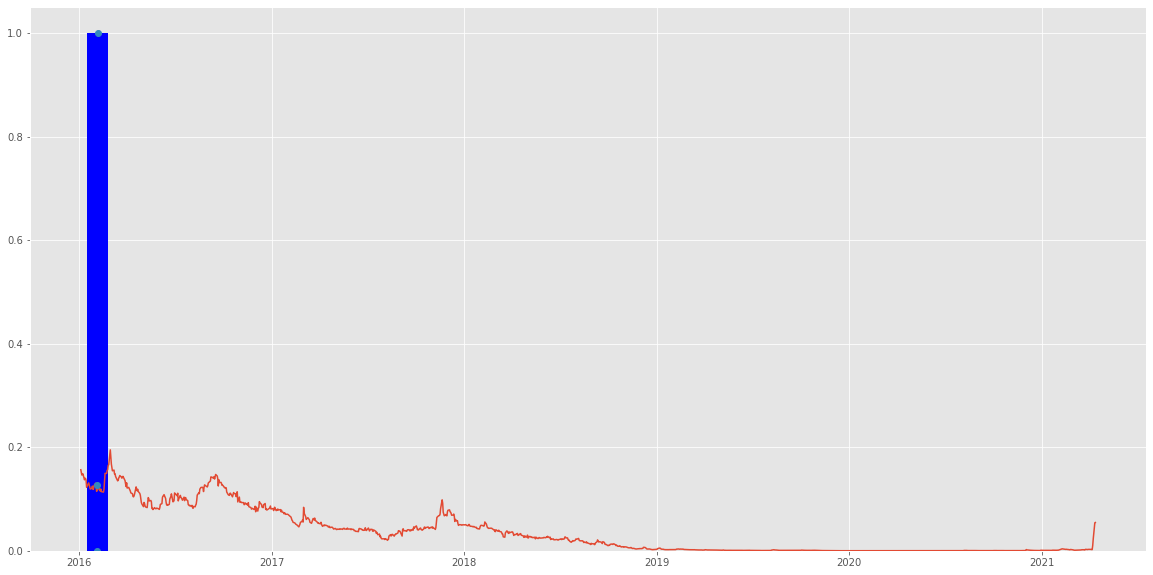

In [61]:
mp.figure(figsize=(20,10))
mp.plot(df_daily_average.index,df_daily_average.RGBP)
price_data = (Final_data[Final_data_2.Ticker_name=='RGBP'].Price-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())/(Final_data[Final_data_2.Ticker_name=='RGBP'].Price.max()-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())
mp.plot(Final_data_2[Final_data.Ticker_name=='RGBP'].Date,price_data,'o')
bar_data = (Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())/(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.max()-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())
mp.bar(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Date,bar_data,width=40,color='blue')

In [154]:
Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.max()

0.4690773910104765

In [155]:
Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min()

0.0008448800270361607

In [33]:
import calendar
from datetime import date
my_date = date.today()
calendar.day_name[(data[data['Ticker_name']=='RGBP']).index[0].weekday()]

'Saturday'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

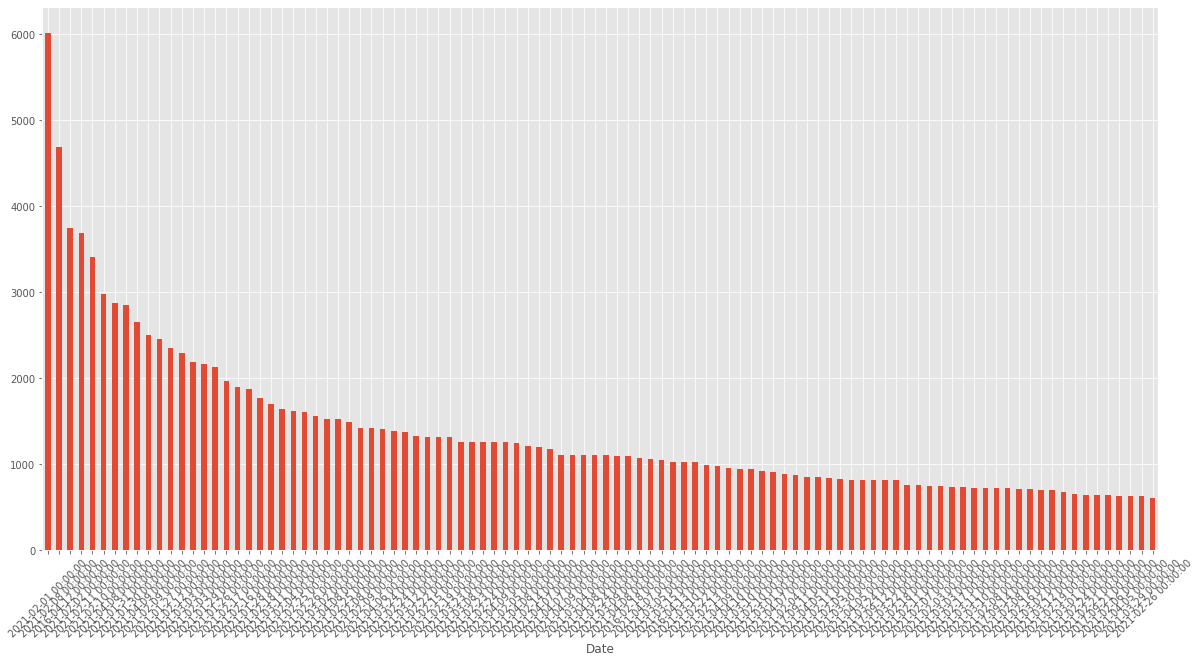

In [34]:
data.sort_values(by='Tweet_counts',ascending=False).Tweet_counts[0:100].plot(kind='bar',figsize=(20,10))
mp.xticks(rotation=45)

In [ ]:
#test_4 = pd.concat([df_daily_average,test_3],axis=1).rename(columns={0:'Indicator_XTRM'})
#test_4 =pd.concat([test_4,test_5],axis=1).rename(columns={'Tweets':'Tweets_XTRM'})
columns = all_clean[all_clean['variable']=='Indicator_INND'].drop(['variable','Date'],axis=1).columns
#index = test_4.index

from sklearn import preprocessing

x = all_clean.drop(['variable','Date'],axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
test_4 = pd.DataFrame(x_scaled)
test_4.columns = columns
test_4.index = all_clean.Date
#test_4.index = index
#test_4 = test_4.fillna('')
#mp.figure(figsize=(20,10))
#mp.plot(all_clean[all_clean['variable']=='Indicator_XTRM']['Date'],all_clean[all_clean['variable']=='Indicator_XTRM']['value'])
#mp.plot(test_4.index,test_4.XTRM)
#test_4[['Tweets_XTRM','Indicator_XTRM','XTRM']].fillna(method='bfill').plot(figsize=(20,10))
#test_4[['Tweets_XTRM','Indicator_XTRM','XTRM']].melt(id_vars='Tweets_XTRM')
all_clean[all_clean['variable']=='Indicator_INND'].drop(['variable','Date'],axis=1).value.plot(figsize=(20,10))
#all_clean[all_clean['variable']=='Indicator_INND'].drop(['variable','Date'],axis=1)['value'].plot()